# Classificação: características de um cogumelo venenoso

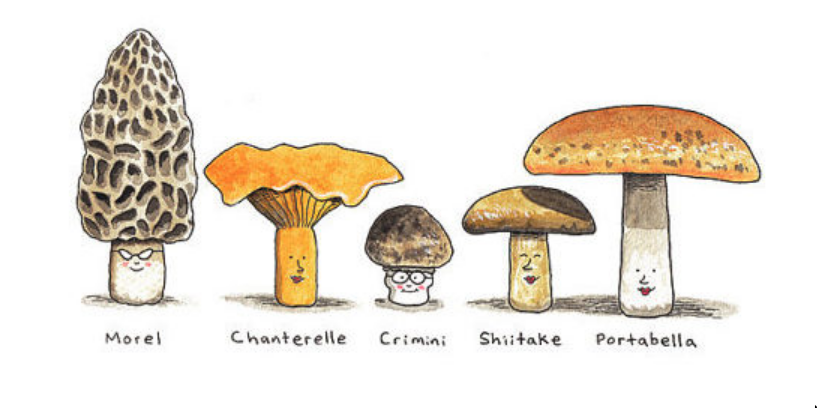

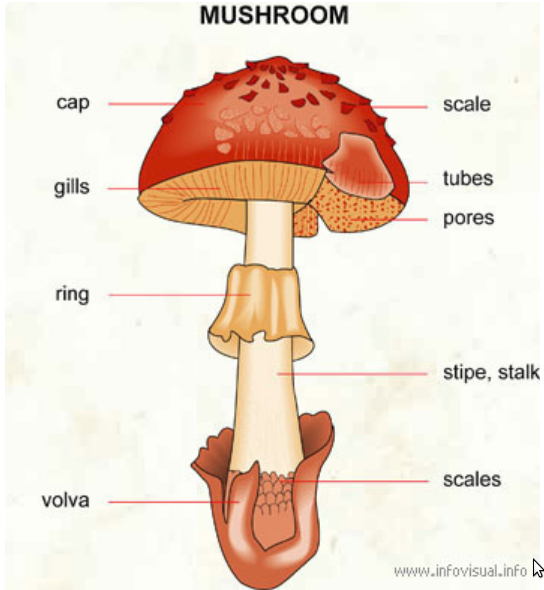

[Comparing Various ML models(ROC curve comparison)](https://www.kaggle.com/nirajvermafcb/comparing-various-ml-models-roc-curve-comparison/notebook)

## 1. Entendendo os  Dados

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("data/mushrooms.csv")

In [3]:
data.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


In [4]:
data.isnull().sum() # sem nenhum dado faltante

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
# temos 2 tipos de cogumelos:
# e == edible
# p == poisonous
data['class'].unique() # classes

array(['p', 'e'], dtype=object)

In [6]:
data.shape

(8124, 23)

In [7]:
# quantidade de observações dentro de
# cada classe
data.groupby('class').size()

class
e    4208
p    3916
dtype: int64

## 2. Tratando e Preparando os Dados

### 2.1 Transformando Dados Categóricos em Números

In [8]:
# como os dados estão em string
# vamos codificá-los em números inteiros
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])
    
# vendo o resultado
data.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3


In [9]:
# temos agora e == 0 e p == 1
data.groupby('class').size()

class
0    4208
1    3916
dtype: int64

In [10]:
# separando variáveis das classes
X = data.iloc[:,1:23]  
y = data.iloc[:, 0]  

### 2.2 Padronizando os Dados

In [11]:
# vamos escalar os dados para que 
# eles variem entre -1 e 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X=scaler.fit_transform(X)

### 2.3 Selecionando variáveis mais Relevantes (Feature Selection)

Precisamos remover as correlações, pois precisamos de variáveis linearmente independentes para executar operações matricias que são usadas em alguns dos modelos de ML.

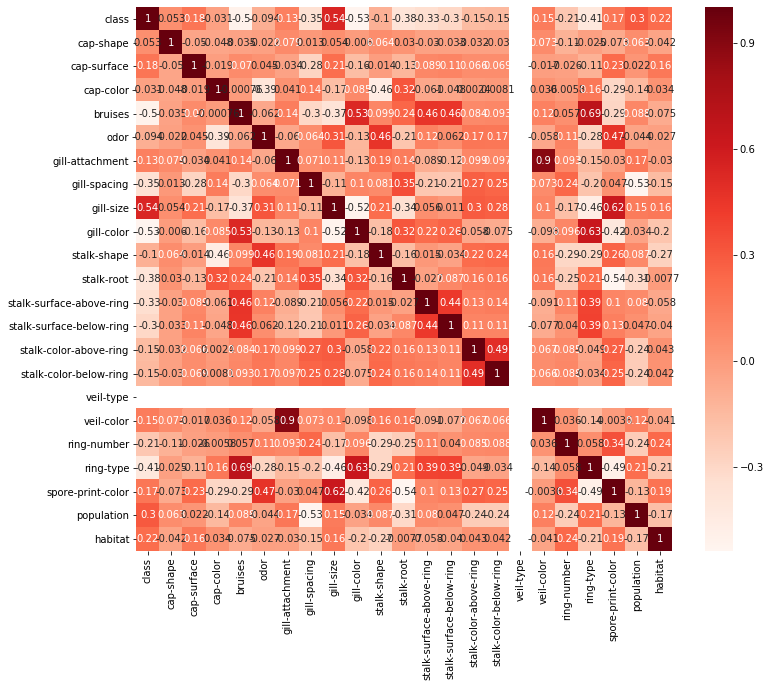

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### 2.4 Análise de Componentes Principais

In [13]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit_transform(X)

array([[-5.74321902e-01, -9.75781349e-01, -1.22176154e+00, ...,
        -2.08581362e-01,  8.13996758e-03, -4.31696985e-18],
       [-2.28210230e+00,  2.79066333e-01, -1.20049669e+00, ...,
         1.52238789e-01, -1.96446132e-01,  1.18077630e-17],
       [-1.85803562e+00, -2.70972362e-01, -1.37237069e+00, ...,
         2.57581784e-01, -3.62577199e-01,  5.23806570e-18],
       ...,
       [-1.62151632e+00, -7.57536709e-01,  2.73357994e+00, ...,
        -1.42532241e+00,  6.36990122e-01,  1.90196512e-19],
       [ 3.67060561e+00, -1.03277450e+00,  1.68459501e-01, ...,
         9.41440123e-02, -6.43462238e-02, -1.08047295e-20],
       [-1.57520272e+00, -1.22858140e+00,  2.44722789e+00, ...,
        -8.04626064e-01,  5.90315263e-01,  2.01680206e-20]])

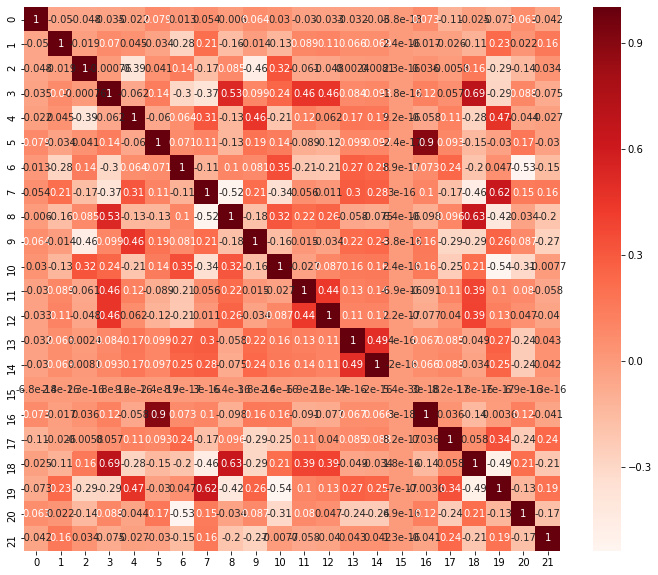

In [14]:
plt.figure(figsize=(12,10))
covariance=pca.get_covariance()
sns.heatmap(covariance, annot=True, cmap=plt.cm.Reds)
plt.show()

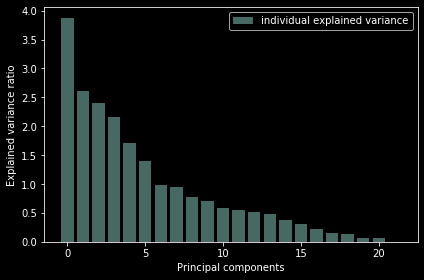

In [15]:
explained_variance=pca.explained_variance_
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    
    plt.bar(range(22), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

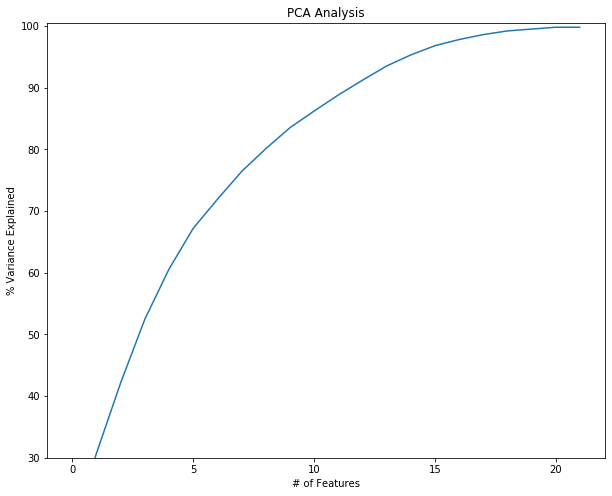

In [16]:
import numpy as np

variance = pca.explained_variance_ratio_ #calculate variance ratios

var = np.cumsum(np.round(variance, decimals=3)*100)

plt.figure(figsize=(10, 8))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var);

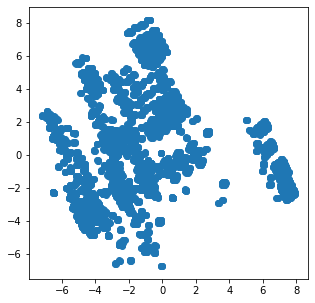

In [17]:
N=data.values
pca = PCA(n_components=2)
x = pca.fit_transform(N)
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1])
plt.show()

Assim, usando K-means, podemos separar bem duas classes, usando os dois primeiros componentes com variação máxima.

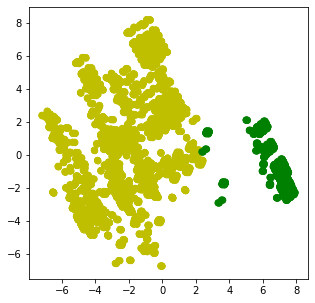

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=5)
X_clustered = kmeans.fit_predict(N)

LABEL_COLOR_MAP = {0 : 'g',
                   1 : 'y'
                  }

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1], c= label_color)
plt.show()

### 2.5 Separando Dados de Teste e Treino

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Executando PCA utilizando 6 componentes com variação máxima.
pca_modified = PCA(n_components=6)
X_train = pca_modified.fit_transform(X_train)
X_test = pca_modified.transform(X_test)

In [20]:
X_train.shape

(6499, 6)

## 3. Modelando

Leia sobre algumas métricas de eficácia:

* [Precision-Recall](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)
* [Cross-validation: evaluating estimator performance](https://scikit-learn.org/stable/modules/cross_validation.html)

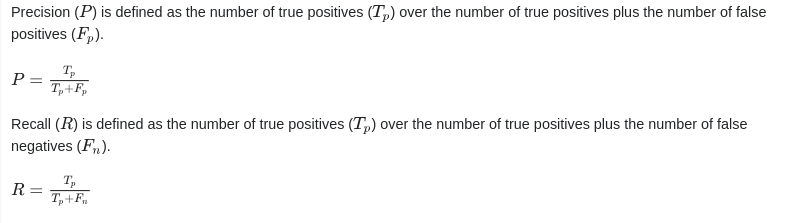

Uma observação sobre F1, que é definido como a média harmônica de precisão e recall. A seguir, um trecho do livro *Machine Learning: An Algorithmic Perspective*:

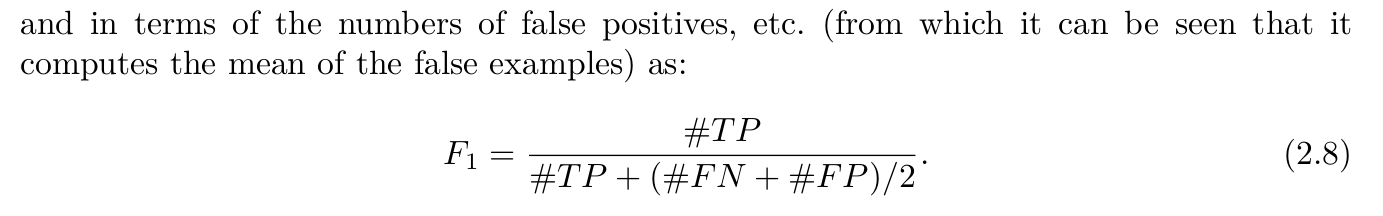

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.model_selection import KFold
from statistics import mean
from statistics import stdev

import matplotlib.pyplot as plt


%matplotlib inline

# def applying_k_folder(): 

#     kfold = KFold(n_splits=10, shuffle=True, random_state=42)

#     scores = []

#     accuracy = []
#     precision = []
#     recall = []
#     f1 =[]

#     for train_index, test_index in kfold.split(X):   
#         X_train, X_test = X[train_index], X[test_index]
#         y_train, y_test = y[train_index], y[test_index]
#         X_train = pca_modified.fit_transform(X_train)
#         X_test = pca_modified.transform(X_test)

#         classifier = RandomForestClassifier(max_depth=2, random_state=0)
#         classifier.fit(X_train, y_train)

#         # Predicting the Test set results
#         y_pred = classifier.predict(X_test)
#         ac = accuracy_score(y_test, y_pred)
#         prec = precision_score(y_test, y_pred)
#         re = recall_score(y_test, y_pred)
#         f = f1_score(y_test, y_pred)

#         accuracy.append(ac)
#         precision.append(prec)
#         recall.append(re)
#         f1.append(f)

#     print("Accuracy estimation: %0.2f (+/- %0.2f)" % (mean(accuracy), stdev(accuracy) * 2))
#     print("Precision estimation: %0.2f (+/- %0.2f)" % (mean(precision), stdev(precision) * 2))
#     print("Recall estimation: %0.2f (+/- %0.2f)" % (mean(recall), stdev(recall) * 2))
#     print("F1 estimation: %0.2f (+/- %0.2f)" % (mean(f1), stdev(f1) * 2))

def metric_extration_estimation(classifier, X_train, y_train, cv=10):
    # estimativa da acurácia
    accuracy = cross_val_score(classifier, X_train, y_train, cv=cv);
    recall = cross_val_score(classifier, X_train, y_train, cv=cv, scoring='recall');
    precision = cross_val_score(classifier, X_train, y_train, cv=cv, scoring='precision');
    f1 = cross_val_score(classifier, X_train, y_train, cv=cv, scoring='f1');
    print("Accuracy estimation: %0.2f (+/- %0.2f)" % (accuracy.mean(), accuracy.std() * 2))
    print("Precision estimation: %0.2f (+/- %0.2f)" % (precision.mean(), precision.std() * 2))
    print("Recall estimation: %0.2f (+/- %0.2f)" % (recall.mean(), recall.std() * 2))
    print("F1 estimation: %0.2f (+/- %0.2f)" % (f1.mean(), f1.std() * 2))
    

def plot_roc_curve(false_positive_rate, true_positive_rate, roc_auc):
    plt.figure(figsize=(10,10))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

def metric_extration(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print("Matriz de Confusão:")
    print(cm)
    print('\n')
    print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))
    print('Precision: ' + str(precision_score(y_test, y_pred)))
    print('Recall: ' + str(recall_score(y_test, y_pred)))
    print('F1: ' + str(f1_score(y_test, y_pred)))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    plot_roc_curve(false_positive_rate, true_positive_rate, roc_auc)

### 3.1 Random Forest

/home/cloves/.local/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Matriz de Confusão:
[[803  42]
 [160 620]]


Accuracy: 0.8756923076923077
Precision: 0.9365558912386707
Recall: 0.7948717948717948
F1: 0.8599167822468794


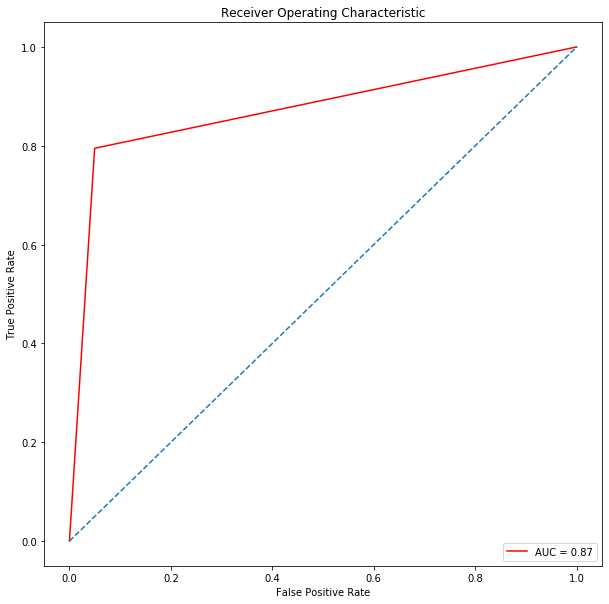

Accuracy estimation: 0.88 (+/- 0.03)
Precision estimation: 0.95 (+/- 0.03)
Recall estimation: 0.79 (+/- 0.05)
F1 estimation: 0.86 (+/- 0.04)


In [22]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

metric_extration(y_test, y_pred)

metric_extration_estimation(classifier, X_train, y_train)

In [31]:
from statistics import mean
from statistics import stdev

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

scores = []

accuracy = []
precision = []
recall = []
f1 =[]

for train_index, test_index in kfold.split(X):   
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_train = pca_modified.fit_transform(X_train)
    X_test = pca_modified.transform(X_test)

    classifier = RandomForestClassifier(max_depth=2, random_state=0)
    classifier.fit(X_train, y_train)
    
    # Predicting the Test set results
    y_pred = classifier.predict(X_test)
    ac = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    re = recall_score(y_test, y_pred)
    f = f1_score(y_test, y_pred)
    
    accuracy.append(ac)
    precision.append(prec)
    recall.append(re)
    f1.append(f)
    
print("Accuracy estimation: %0.2f (+/- %0.2f)" % (mean(accuracy), stdev(accuracy) * 2))
print("Precision estimation: %0.2f (+/- %0.2f)" % (mean(precision), stdev(precision) * 2))
print("Recall estimation: %0.2f (+/- %0.2f)" % (mean(recall), stdev(recall) * 2))
print("F1 estimation: %0.2f (+/- %0.2f)" % (mean(f1), stdev(f1) * 2))

Accuracy estimation: 0.87 (+/- 0.02)
Precision estimation: 0.94 (+/- 0.06)
Recall estimation: 0.79 (+/- 0.08)
F1 estimation: 0.86 (+/- 0.03)


### XGBoost

In [27]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train , y_train)

y_pred = xgb_model.predict(X_train)

#metric_extration(y_test, y_pred)

metric_extration_estimation(xgb_model, X_train, y_train)

/home/cloves/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/cloves/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/cloves/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/cloves/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Re

/home/cloves/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/cloves/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/cloves/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/cloves/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Re

Accuracy estimation: 0.99 (+/- 0.01)
Precision estimation: 0.99 (+/- 0.01)
Recall estimation: 0.98 (+/- 0.01)
F1 estimation: 0.99 (+/- 0.01)


/home/cloves/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### 3.2 SVM Linear

Matriz de Confusão:
[[407  26]
 [ 59 321]]


Accuracy: 0.8954489544895449
Precision: 0.9250720461095101
Recall: 0.8447368421052631
F1: 0.8830811554332875


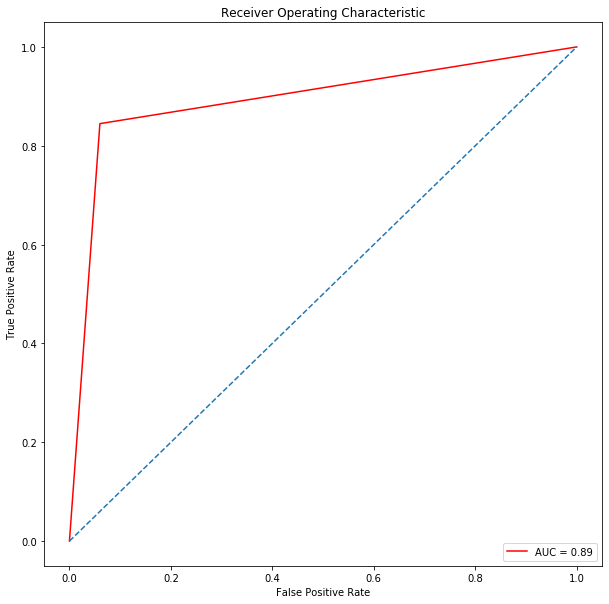

Accuracy estimation: 0.86 (+/- 0.27)
Precision estimation: 0.90 (+/- 0.27)
Recall estimation: 0.83 (+/- 0.42)
F1 estimation: 0.84 (+/- 0.33)


In [34]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

classifier = svm.LinearSVC(random_state=2, C=1.0)

classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

metric_extration(y_test, y_pred)

metric_extration_estimation(classifier, X_train, y_train)

In [35]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

scores = []

accuracy = []
precision = []
recall = []
f1 =[]

for train_index, test_index in kfold.split(X):   
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_train = pca_modified.fit_transform(X_train)
    X_test = pca_modified.transform(X_test)

    classifier = svm.LinearSVC(random_state=2, C=1.0)
    classifier.fit(X_train, y_train)
    
    # Predicting the Test set results
    y_pred = classifier.predict(X_test)
    ac = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    re = recall_score(y_test, y_pred)
    f = f1_score(y_test, y_pred)
    
    accuracy.append(ac)
    precision.append(prec)
    recall.append(re)
    f1.append(f)
    
print("Accuracy estimation: %0.2f (+/- %0.2f)" % (mean(accuracy), stdev(accuracy) * 2))
print("Precision estimation: %0.2f (+/- %0.2f)" % (mean(precision), stdev(precision) * 2))
print("Recall estimation: %0.2f (+/- %0.2f)" % (mean(recall), stdev(recall) * 2))
print("F1 estimation: %0.2f (+/- %0.2f)" % (mean(f1), stdev(f1) * 2))

Accuracy estimation: 0.89 (+/- 0.01)
Precision estimation: 0.94 (+/- 0.02)
Recall estimation: 0.84 (+/- 0.03)
F1 estimation: 0.88 (+/- 0.01)


### 3.3 Regressão Logística

Matriz de Confusão:
[[400  33]
 [ 53 327]]


Accuracy: 0.8942189421894219
Precision: 0.9083333333333333
Recall: 0.8605263157894737
F1: 0.8837837837837837


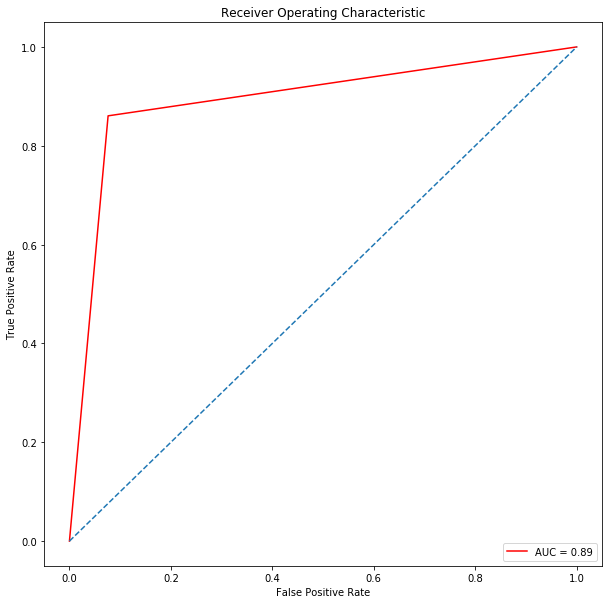

Accuracy estimation: 0.86 (+/- 0.26)
Precision estimation: 0.90 (+/- 0.28)
Recall estimation: 0.84 (+/- 0.39)
F1 estimation: 0.85 (+/- 0.30)


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

model_LR= LogisticRegression()
model_LR.fit(X_train,y_train)

y_prob = model_LR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.

metric_extration(y_test, y_pred)
metric_extration_estimation(model_LR, X_train, y_train)

In [39]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

scores = []

accuracy = []
precision = []
recall = []
f1 =[]

for train_index, test_index in kfold.split(X):   
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_train = pca_modified.fit_transform(X_train)
    X_test = pca_modified.transform(X_test)

    model_LR= LogisticRegression()
    model_LR.fit(X_train,y_train)
    
    # Predicting the Test set results
    y_pred = model_LR.predict(X_test)
    ac = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    re = recall_score(y_test, y_pred)
    f = f1_score(y_test, y_pred)
    
    accuracy.append(ac)
    precision.append(prec)
    recall.append(re)
    f1.append(f)
    
print("Accuracy estimation: %0.2f (+/- %0.2f)" % (mean(accuracy), stdev(accuracy) * 2))
print("Precision estimation: %0.2f (+/- %0.2f)" % (mean(precision), stdev(precision) * 2))
print("Recall estimation: %0.2f (+/- %0.2f)" % (mean(recall), stdev(recall) * 2))
print("F1 estimation: %0.2f (+/- %0.2f)" % (mean(f1), stdev(f1) * 2))

Accuracy estimation: 0.90 (+/- 0.01)
Precision estimation: 0.93 (+/- 0.02)
Recall estimation: 0.86 (+/- 0.03)
F1 estimation: 0.89 (+/- 0.01)


### 3.4 SVM Polinomial

Matriz de Confusão:
[[800  45]
 [ 16 764]]


Accuracy: 0.9624615384615385
Precision: 0.9443757725587144
Recall: 0.9794871794871794
F1: 0.961611076148521


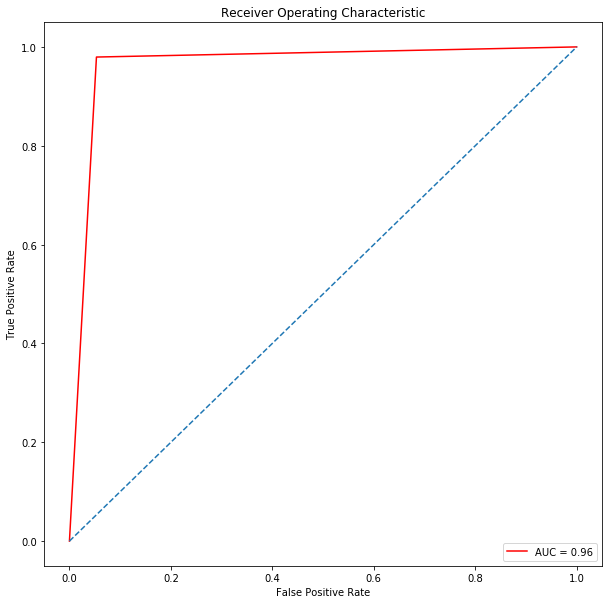

Accuracy estimation: 0.96 (+/- 0.01)
Precision estimation: 0.94 (+/- 0.02)
Recall estimation: 0.97 (+/- 0.02)
F1 estimation: 0.96 (+/- 0.01)


In [44]:
classifier = svm.SVC(kernel='poly', degree=2, coef0=0.0, random_state=2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

metric_extration(y_test, y_pred)
metric_extration_estimation(classifier, X_train, y_train)

In [40]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

scores = []

accuracy = []
precision = []
recall = []
f1 =[]

for train_index, test_index in kfold.split(X):   
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_train = pca_modified.fit_transform(X_train)
    X_test = pca_modified.transform(X_test)

    classifier = svm.SVC(kernel='poly', degree=2, coef0=0.0, random_state=2)
    classifier.fit(X_train, y_train)
    
    # Predicting the Test set results
    y_pred = classifier.predict(X_test)
    ac = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    re = recall_score(y_test, y_pred)
    f = f1_score(y_test, y_pred)
    
    accuracy.append(ac)
    precision.append(prec)
    recall.append(re)
    f1.append(f)
    
print("Accuracy estimation: %0.2f (+/- %0.2f)" % (mean(accuracy), stdev(accuracy) * 2))
print("Precision estimation: %0.2f (+/- %0.2f)" % (mean(precision), stdev(precision) * 2))
print("Recall estimation: %0.2f (+/- %0.2f)" % (mean(recall), stdev(recall) * 2))
print("F1 estimation: %0.2f (+/- %0.2f)" % (mean(f1), stdev(f1) * 2))

Accuracy estimation: 0.96 (+/- 0.01)
Precision estimation: 0.95 (+/- 0.02)
Recall estimation: 0.98 (+/- 0.02)
F1 estimation: 0.96 (+/- 0.01)


### 3.5 SVM Radial

Matriz de Confusão:
[[837   8]
 [  7 773]]


Accuracy: 0.9907692307692307
Precision: 0.9897567221510883
Recall: 0.9910256410256411
F1: 0.9903907751441384


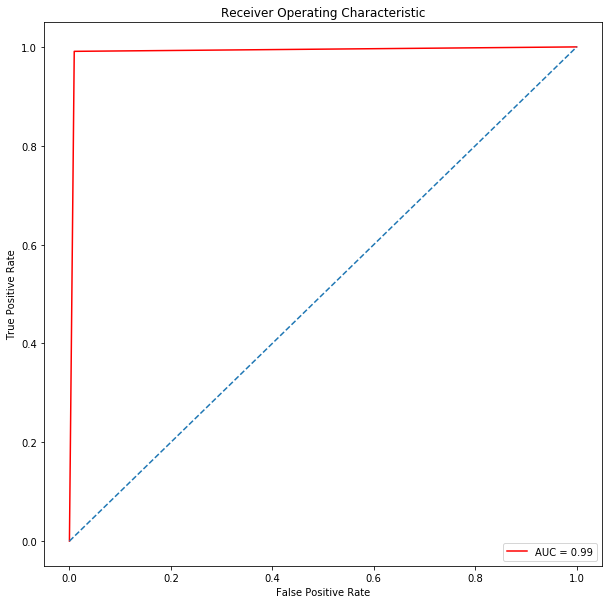

Accuracy estimation: 0.99 (+/- 0.01)
Precision estimation: 0.99 (+/- 0.01)
Recall estimation: 0.99 (+/- 0.01)
F1 estimation: 0.99 (+/- 0.01)


In [45]:
classifier = svm.SVC(kernel='rbf', gamma='auto', random_state=2) # ‘auto’ que usa 1 / n_features

classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

metric_extration(y_test, y_pred)
metric_extration_estimation(classifier, X_train, y_train)

In [41]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

scores = []

accuracy = []
precision = []
recall = []
f1 =[]

for train_index, test_index in kfold.split(X):   
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_train = pca_modified.fit_transform(X_train)
    X_test = pca_modified.transform(X_test)

    classifier = svm.SVC(kernel='rbf', gamma='auto', random_state=2) # ‘auto’ que usa 1 / n_features
    classifier.fit(X_train, y_train)
    
    # Predicting the Test set results
    y_pred = classifier.predict(X_test)
    ac = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    re = recall_score(y_test, y_pred)
    f = f1_score(y_test, y_pred)
    
    accuracy.append(ac)
    precision.append(prec)
    recall.append(re)
    f1.append(f)
    
print("Accuracy estimation: %0.2f (+/- %0.2f)" % (mean(accuracy), stdev(accuracy) * 2))
print("Precision estimation: %0.2f (+/- %0.2f)" % (mean(precision), stdev(precision) * 2))
print("Recall estimation: %0.2f (+/- %0.2f)" % (mean(recall), stdev(recall) * 2))
print("F1 estimation: %0.2f (+/- %0.2f)" % (mean(f1), stdev(f1) * 2))

Accuracy estimation: 0.99 (+/- 0.00)
Precision estimation: 1.00 (+/- 0.01)
Recall estimation: 0.99 (+/- 0.01)
F1 estimation: 0.99 (+/- 0.00)


### 3.6 Rede Neural Artificial 

## 4. Modelando Usando Técnicas Contra Overfitting e cross-validation com K-folders

# Leituras Complementares

* [Feature Selection with sklearn and Pandas](https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b)